In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'

# df = pd.read_csv(url, header = None, na_values = ['?'])

# df.drop([0, 1, 2, 3, 4], axis = 1, inplace = True)
# df.dropna(inplace = True)

# X = df.drop(127, axis = 1, inplace = False)
# y = df[127]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
# df = load_boston()

# housing = pd.DataFrame(df.data)

# housing.columns = df.feature_names
# housing['Price'] = df.target

# X = housing.drop('Price', axis = 1, inplace = False)
# y = housing['Price']

# print(housing)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1, shuffle = True)

In [ ]:
df = fetch_california_housing()

housing = pd.DataFrame(df.data)

housing.columns = df.feature_names
housing['Price'] = df.target

X = housing.drop('Price', axis = 1, inplace = False)
y = housing['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 1, shuffle = True)

Linear Regression



In [ ]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression(copy_X = True, fit_intercept = True, n_jobs = None, normalize = False)

print("Coefficients :", linear_regression.coef_, "\n")

train_pred_linear = linear_regression.predict(X_train)
test_pred_linear = linear_regression.predict(X_test)

print("Training Error on Linear Regression Model :", metrics.mean_squared_error(y_train, train_pred_linear), "\n")
print("Generalisation Error of Linear Regression Model :", metrics.mean_squared_error(y_test, test_pred_linear))

Coefficients : [ 3.95756322e-01  1.09421458e-02 -1.43702376e-02  1.63555930e-01
  1.36694668e-05 -2.51888795e-01 -4.33561886e-01 -4.16993317e-01] 

Training Error on Linear Regression Model : 0.4864539687571813 

Generalisation Error of Linear Regression Model : 8.844120921880256


Lasso Regression(L1 Regularisation)

In [ ]:
lasso_regression = Lasso(alpha = 0.0005, normalize = True)

lasso_regression.fit(X_train, y_train)

print("Coefficients :", lasso_regression.coef_, "\n")

train_pred_lasso = lasso_regression.predict(X_train)
test_pred_lasso = lasso_regression.predict(X_test)

print("Training Error on Lasso Regression Model :", metrics.mean_squared_error(y_train, train_pred_lasso), "\n")
print("Generalisation Error of Lasso Regression Model :", metrics.mean_squared_error(y_test, test_pred_lasso))

Coefficients : [ 0.39398091  0.01132389  0.          0.01214647  0.         -0.22097932
 -0.2217145  -0.19283625] 

Training Error on Lasso Regression Model : 0.518915834842168 

Generalisation Error of Lasso Regression Model : 6.937543941227409


In [ ]:
lasso_regression_cv = LassoCV(n_alphas = 1000, normalize = True, random_state = 1)

lasso_regression_cv.fit(X_train, y_train)

print("Coefficients :", lasso_regression.coef_, "\n")

print("Chosen regularisation parameter :", lasso_regression_cv.alpha_, "\n")

train_pred_lassocv = lasso_regression.predict(X_train)
test_pred_lassocv = lasso_regression_cv.predict(X_test)

print("Training Error of Lasso Regression Model :", metrics.mean_squared_error(y_train, train_pred_lassocv), "\n")
print("Generalisation Error of Lasso Regression Model : ", metrics.mean_squared_error(y_test, test_pred_lassocv))

Coefficients : [ 0.39398091  0.01132389  0.          0.01214647  0.         -0.22097932
 -0.2217145  -0.19283625] 

Chosen regularisation parameter : 0.00015920965170119252 

Training Error of Lasso Regression Model : 0.518915834842168 

Generalisation Error of Lasso Regression Model :  8.210627054413106


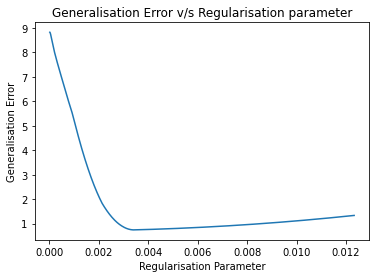

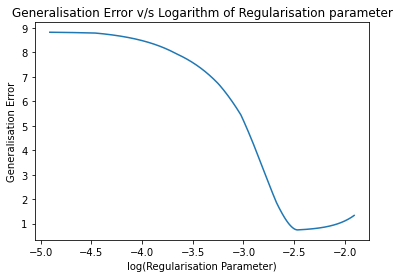

In [ ]:
def lasso(X_train, y_train, X_test, y_test, alpha):
    lasso = Lasso(alpha = alpha, normalize = True)
    lasso.fit(X_train, y_train)
    return lasso.predict(X_test)

alphas = np.array(lasso_regression_cv.alphas_)

x = np.array(alphas)
x_log = np.array([math.log(alpha, 10) for alpha in alphas])
y = np.array([metrics.mean_squared_error(y_test, lasso(X_train, y_train, X_test, y_test, alpha)) for alpha in alphas])

plt.plot(x, y)
plt.title("Generalisation Error v/s Regularisation parameter")
plt.xlabel("Regularisation Parameter")
plt.ylabel("Generalisation Error")
plt.show()

plt.plot(x_log, y)
plt.title("Generalisation Error v/s Logarithm of Regularisation parameter")
plt.xlabel("log(Regularisation Parameter)")
plt.ylabel("Generalisation Error")
plt.show()

Ridge Regression(L2 Regularisation)

In [ ]:
ridge_regression = Ridge(alpha = 0.1, normalize = True)

ridge_regression.fit(X_train, y_train)

print("Coefficients : \n", ridge_regression.coef_, "\n")

train_pred_ridge = ridge_regression.predict(X_train)
test_pred_ridge = ridge_regression.predict(X_test)

print("Training Error of Ridge Regression Model :", metrics.mean_squared_error(y_train, train_pred_ridge), "\n")
print("Generalisation Error of Ridge Regression Model :", metrics.mean_squared_error(y_test, test_pred_ridge))

Coefficients : 
 [ 3.76760328e-01  1.33376587e-02  3.60605818e-03  3.25448371e-02
  2.19542323e-05 -2.38957591e-01 -1.96088622e-01 -1.65868238e-01] 

Training Error of Ridge Regression Model : 0.5263808713584214 

Generalisation Error of Ridge Regression Model : 8.033483614037692


In [ ]:
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 5, 10, 50, 100, 200, 500, 1000]

ridge_regression_cv = RidgeCV(alphas = alphas, normalize = True, scoring = 'neg_mean_squared_error')

ridge_regression_cv.fit(X_train, y_train)

#RidgeCV automatically chooses the best regularisation parameter possible
print("Chosen regularisation parameter :", ridge_regression_cv.alpha_, "\n")

print("Coefficients : \n", ridge_regression_cv.coef_, "\n")

train_pred_ridgecv = ridge_regression_cv.predict(X_train)
test_pred_ridgecv = ridge_regression_cv.predict(X_test)

print("Training Error of Ridge Regression Model :", metrics.mean_squared_error(y_train, train_pred_ridgecv))
print("Generalisation Error of Ridge Regression Model :", metrics.mean_squared_error(y_test, test_pred_ridgecv))

Chosen regularisation parameter : 0.01 

Coefficients : 
 [ 3.97481045e-01  1.17773842e-02 -1.28759883e-02  1.45496184e-01
  1.70477924e-05 -2.51612770e-01 -3.80353957e-01 -3.60663140e-01] 

Training Error of Ridge Regression Model : 0.4881552574913633
Generalisation Error of Ridge Regression Model : 8.822950246148862


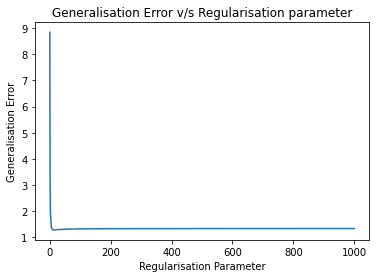

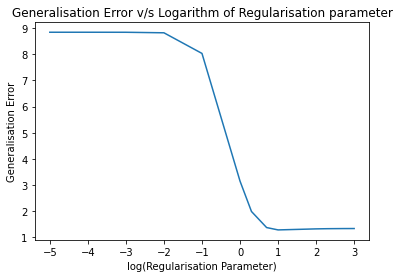

In [ ]:
def ridge(X_train, y_train, X_test, y_test, alpha):
    ridge = Ridge(alpha = alpha, normalize = True)
    ridge.fit(X_train, y_train)
    return ridge.predict(X_test)

x_log = np.array([math.log(alpha, 10) for alpha in alphas])
x = np.array(alphas)
y = np.array([metrics.mean_squared_error(y_test, ridge(X_train, y_train, X_test, y_test, alpha)) for alpha in alphas])

plt.plot(x, y)
plt.title("Generalisation Error v/s Regularisation parameter")
plt.xlabel("Regularisation Parameter")
plt.ylabel("Generalisation Error")
plt.show()

plt.plot(x_log, y)
plt.title("Generalisation Error v/s Logarithm of Regularisation parameter")
plt.xlabel("log(Regularisation Parameter)")
plt.ylabel("Generalisation Error")
plt.show()

In [ ]:
elastic_regression = ElasticNet(alpha = 0.001, l1_ratio = 0.3, normalize = True)

elastic_regression.fit(X_train, y_train)

print("Coefficients : \n", elastic_regression.coef_, "\n")

train_pred_elastic = elastic_regression.predict(X_train)
test_pred_elastic = elastic_regression.predict(X_test)

print("Training Error of Elastic Regression Model :", metrics.mean_squared_error(y_train, train_pred_elastic), "\n")
print("Generalisation Error of Elastic Regression Model :", metrics.mean_squared_error(y_test, test_pred_elastic))

Coefficients : 
 [ 1.06566609e-01  2.38680373e-03  6.84439500e-03 -3.94822199e-03
 -2.51569274e-06 -6.49296803e-02 -2.04625089e-02 -4.28981486e-03] 

Training Error of Elastic Regression Model : 0.9948646996252336 

Generalisation Error of Elastic Regression Model : 1.5502852179057978


In [ ]:
elastic_regression_cv = ElasticNetCV(l1_ratio = 0.7, n_alphas = 100, normalize = True)

elastic_regression_cv.fit(X_train, y_train)

print("Chosen regularisation parameter :", ridge_regression_cv.alpha_, "\n")

print("Coefficients : \n", elastic_regression.coef_, "\n")

train_pred_elasticcv = elastic_regression.predict(X_train)
test_pred_elasticcv = elastic_regression.predict(X_test)

print("Alphas :\n", elastic_regression_cv.alphas_, "\n")

print("Training Error of Elastic Regression Model :", metrics.mean_squared_error(y_train, train_pred_elasticcv), "\n")
print("Generalisation Error of Elastic Regression Model :", metrics.mean_squared_error(y_test, test_pred_elasticcv))

Chosen regularisation parameter : 0.01 

Coefficients : 
 [ 1.06566609e-01  2.38680373e-03  6.84439500e-03 -3.94822199e-03
 -2.51569274e-06 -6.49296803e-02 -2.04625089e-02 -4.28981486e-03] 

Alphas :
 [1.76100359e-02 1.64231784e-02 1.53163112e-02 1.42840430e-02
 1.33213463e-02 1.24235322e-02 1.15862277e-02 1.08053547e-02
 1.00771100e-02 9.39794650e-03 8.76455636e-03 8.17385460e-03
 7.62296415e-03 7.10920188e-03 6.63006547e-03 6.18322125e-03
 5.76649283e-03 5.37785051e-03 5.01540139e-03 4.67738012e-03
 4.36214035e-03 4.06814669e-03 3.79396722e-03 3.53826653e-03
 3.29979921e-03 3.07740378e-03 2.86999707e-03 2.67656887e-03
 2.49617709e-03 2.32794311e-03 2.17104753e-03 2.02472620e-03
 1.88826643e-03 1.76100359e-03 1.64231784e-03 1.53163112e-03
 1.42840430e-03 1.33213463e-03 1.24235322e-03 1.15862277e-03
 1.08053547e-03 1.00771100e-03 9.39794650e-04 8.76455636e-04
 8.17385460e-04 7.62296415e-04 7.10920188e-04 6.63006547e-04
 6.18322125e-04 5.76649283e-04 5.37785051e-04 5.01540139e-04
 4.677

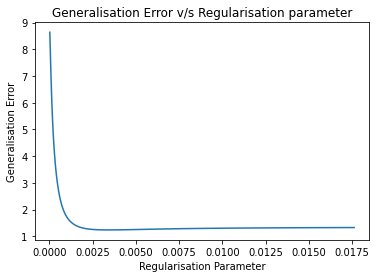

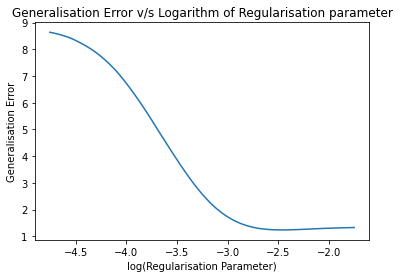

In [ ]:
def elastic(X_train, y_train, X_test, y_test, alpha):
    elastic = ElasticNet(alpha = alpha, l1_ratio = 0.5, normalize = True)
    elastic.fit(X_train, y_train)
    return elastic.predict(X_test)

alphas = np.array(elastic_regression_cv.alphas_)

x = np.array(alphas)
x_log = np.array([math.log(alpha, 10) for alpha in alphas])
y = np.array([metrics.mean_squared_error(y_test, elastic(X_train, y_train, X_test, y_test, alpha)) for alpha in alphas])

plt.plot(x, y)
plt.title("Generalisation Error v/s Regularisation parameter")
plt.xlabel("Regularisation Parameter")
plt.ylabel("Generalisation Error")
plt.show()

plt.plot(x_log, y)
plt.title("Generalisation Error v/s Logarithm of Regularisation parameter")
plt.xlabel("log(Regularisation Parameter)")
plt.ylabel("Generalisation Error")
plt.show()